# Simulating Waves in String in 3D
My goal for this project was to create a simulation that, on a very simple level, simulates a guitar string being plucked.

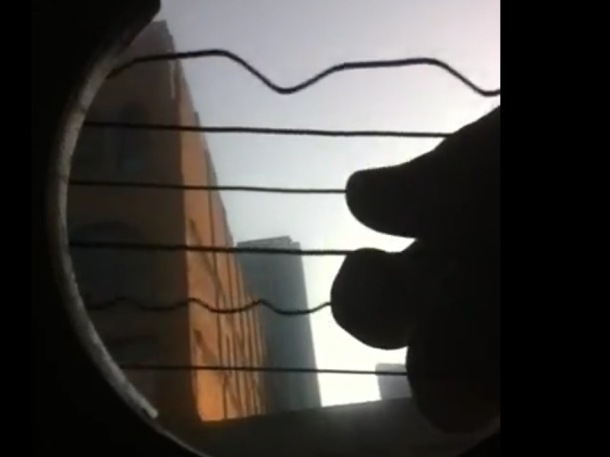

In [16]:
from IPython.display import Image, display

display(Image(filename='Gituar_waves.jpg', width=400)) 

This image is the best I could find for seeing standing waves of guitar strings. 

This notebook will show captures in time for the waveforms. There is an accompanying Python script for creating a manim animation named animate_guitar.py and a premade animation titled StringWave.mp4.

I modeled the wave of the guitar string of length L using the equations from Chapter 16.3 

$\begin{align}
  \frac{\partial^2u}{\partial t^2} = c^2 \frac{\partial^2u}{\partial x^2}
\end{align}$ with boundary conditions 
$\begin{align}
  y (0,t)= y(L,t) = 0
\end{align}$

Solving this differential equation yields the position of the string concerning its x position and time.

$\begin{align}
  y(x,t) = A_y \sin{k_y x}\cos{\omega_y t}
\end{align}$
; with 
$\begin{align}
  k_y = n \frac{\pi}{L}
\end{align}$ and 
$\begin{align}
  \omega_y = n c \frac{\pi}{L}
\end{align}$
where n is a natural number and c is the wave's speed through the medium.

Now, to apply this to a guitar string, I added a second wave function in the z direction concerning x and t:

$\begin{align}
  z(x,t) = A_z \sin{k_z x}\cos{\omega_z t}
\end{align}$ following the same logic with the constants but allowing for a different n.

The last step came with adding a simple damping term to observe the time evolution of the system.

$\begin{align}
  z(x,t) = e^{-a t}A_z \sin{k_z x}\cos{\omega_z t}
\end{align}$

Where a is a postive constant to describe the damping 



# Visulisation

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#parameters
L = 10 # length of string
A_y = 0.75    # amplitude in x
A_z = 2     # amplitude in y
n_y = 2     # normal mode in z
n_z = 5    # normal mode in y
k_z = np.pi*n_z/L      # spatial frequency
k_y = np.pi*n_y/L      # spatial frequency
c = 5 # wave speed
omega_y =  c*np.pi*n_y/L   # angular frequency for y
omega_z =  c*np.pi*n_z/L   # angular frequency for z
a = .2         #decay constant
d1 = 0         # phase constant for y
d2 = 0         # phase constant for z

def wave_string(x,t, L =L, A_y = A_y, A_z = A_z,
               n_y = n_y, n_z = n_z, c = c, a = a,
               d1 = d1, d2 = d2):
    """
    Returns the 3d point at a certain x for time t
    """
    y = A_y * np.sin(k_y*x)* np.cos(omega_y*t - d1) * np.exp(-a*t)
    z = A_z * np.sin(k_z*x)* np.cos(omega_z*t - d2) * np.exp(-a*t)
    return (x,y,z)
    
    
    

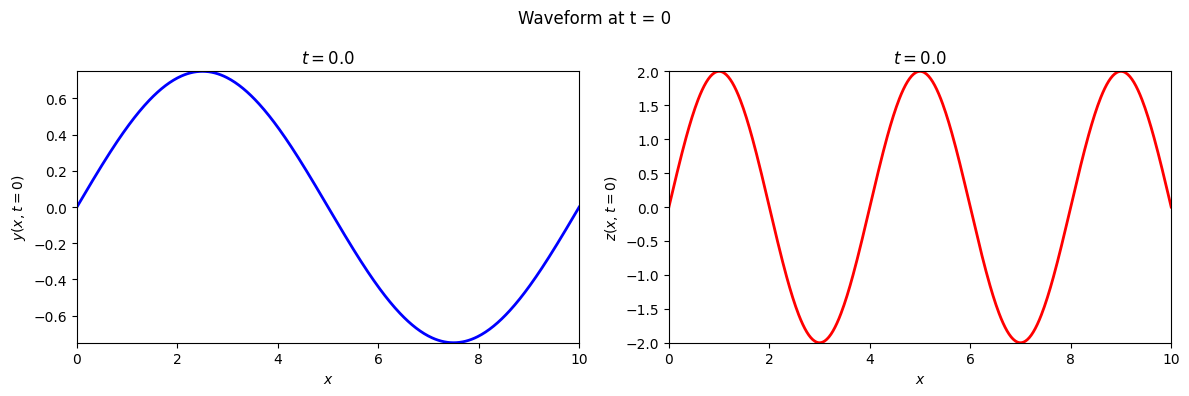

In [23]:
#x points
x_pts = np.linspace(0, L, 500)
t = 0
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Waveform at t = 0')
#plot y 
ax1.set_xlim(0, L)
ax1.set_ylim(-A_y, A_y)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y(x, t=0)$')
ax1.set_title(rf'$t = {t:.1f}$')
line1, = ax1.plot(x_pts, wave_string(x_pts, t)[1], lw=2, color='blue')
#plot z
ax2.set_xlim(0, L)
ax2.set_ylim(-A_z, A_z)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$z(x, t=0)$')
ax2.set_title(rf'$t = {t:.1f}$')
line2, = ax2.plot(x_pts, wave_string(x_pts, t)[2], lw=2, color='red')
#plot
fig.tight_layout()
plt.show()

## Lets Try a later time 

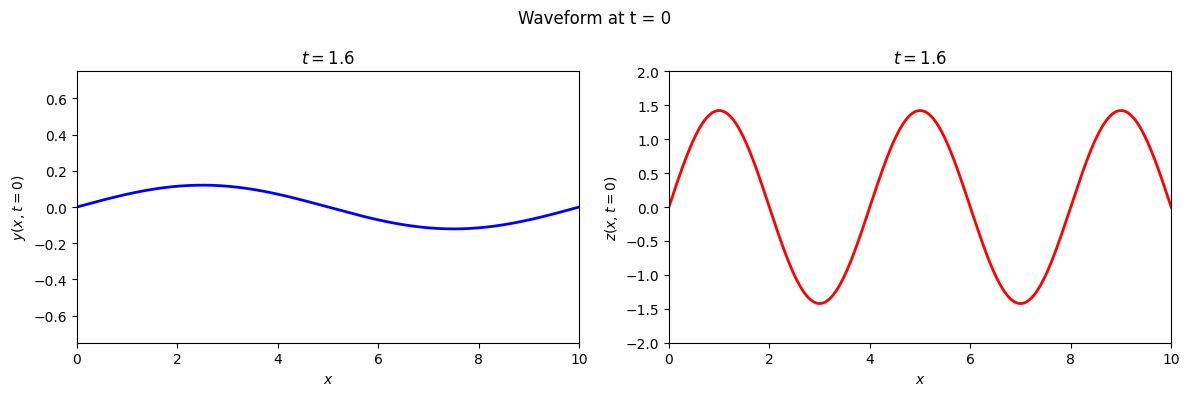

In [25]:

#x points
x_pts = np.linspace(0, L, 500)
t = np.pi/2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Waveform at t = 0')
#plot y 
ax1.set_xlim(0, L)
ax1.set_ylim(-A_y, A_y)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y(x, t=0)$')
ax1.set_title(rf'$t = {t:.1f}$')
line1, = ax1.plot(x_pts, wave_string(x_pts, t)[1], lw=2, color='blue')
#plot z
ax2.set_xlim(0, L)
ax2.set_ylim(-A_z, A_z)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$z(x, t=0)$')
ax2.set_title(rf'$t = {t:.1f}$')
line2, = ax2.plot(x_pts, wave_string(x_pts, t)[2], lw=2, color='red')
#plot
fig.tight_layout()
plt.show()

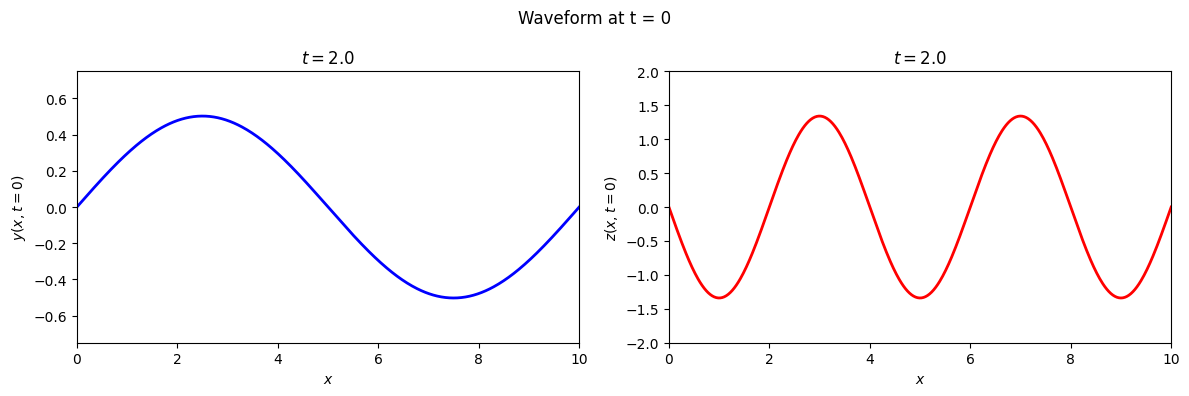

In [27]:
#x points
x_pts = np.linspace(0, L, 500)
t = 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Waveform at t = 0')
#plot y 
ax1.set_xlim(0, L)
ax1.set_ylim(-A_y, A_y)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y(x, t=0)$')
ax1.set_title(rf'$t = {t:.1f}$')
line1, = ax1.plot(x_pts, wave_string(x_pts, t)[1], lw=2, color='blue')
#plot z
ax2.set_xlim(0, L)
ax2.set_ylim(-A_z, A_z)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$z(x, t=0)$')
ax2.set_title(rf'$t = {t:.1f}$')
line2, = ax2.plot(x_pts, wave_string(x_pts, t)[2], lw=2, color='red')
#plot
fig.tight_layout()
plt.show()

Now lets look at an manim animation!